
현대건설 주요 지표 포함 데이터:
           date   open   high    low  close  volume  ticker  name        RSI  \
6121 2024-10-25  28200  28350  27800  28050  361638  000720  현대건설  25.609756   
6122 2024-10-28  27850  28600  27850  28550  219677  000720  현대건설  32.967033   
6123 2024-10-29  28550  28600  28150  28500  169288  000720  현대건설  27.906977   
6124 2024-10-30  28500  28550  28200  28250  185467  000720  현대건설  27.586207   
6125 2024-10-31  28100  28100  27850  27900  422938  000720  현대건설  27.272727   

       SMA_20   SMA_50        MACD  MACD_signal  
6121  29900.0  30706.0 -614.301040  -435.137352  
6122  29797.5  30653.0 -629.911268  -474.092135  
6123  29662.5  30604.0 -638.951632  -507.064035  
6124  29537.5  30541.0 -658.696058  -537.390439  
6125  29407.5  30484.0 -694.579058  -568.828163  

레이블 완료 데이터:
           date  close  label_avg
6121 2024-10-25  28050          0
6122 2024-10-28  28550          0
6123 2024-10-29  28500          0
6124 2024-10-30  28250          0
6125 2024-10-31 

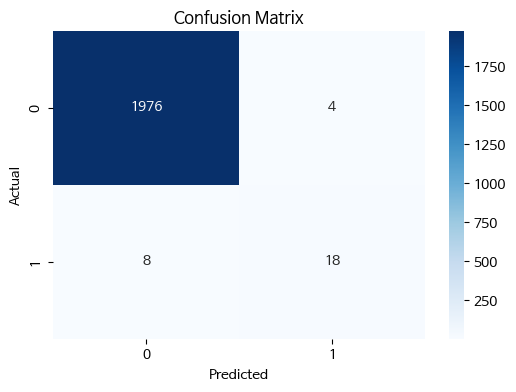

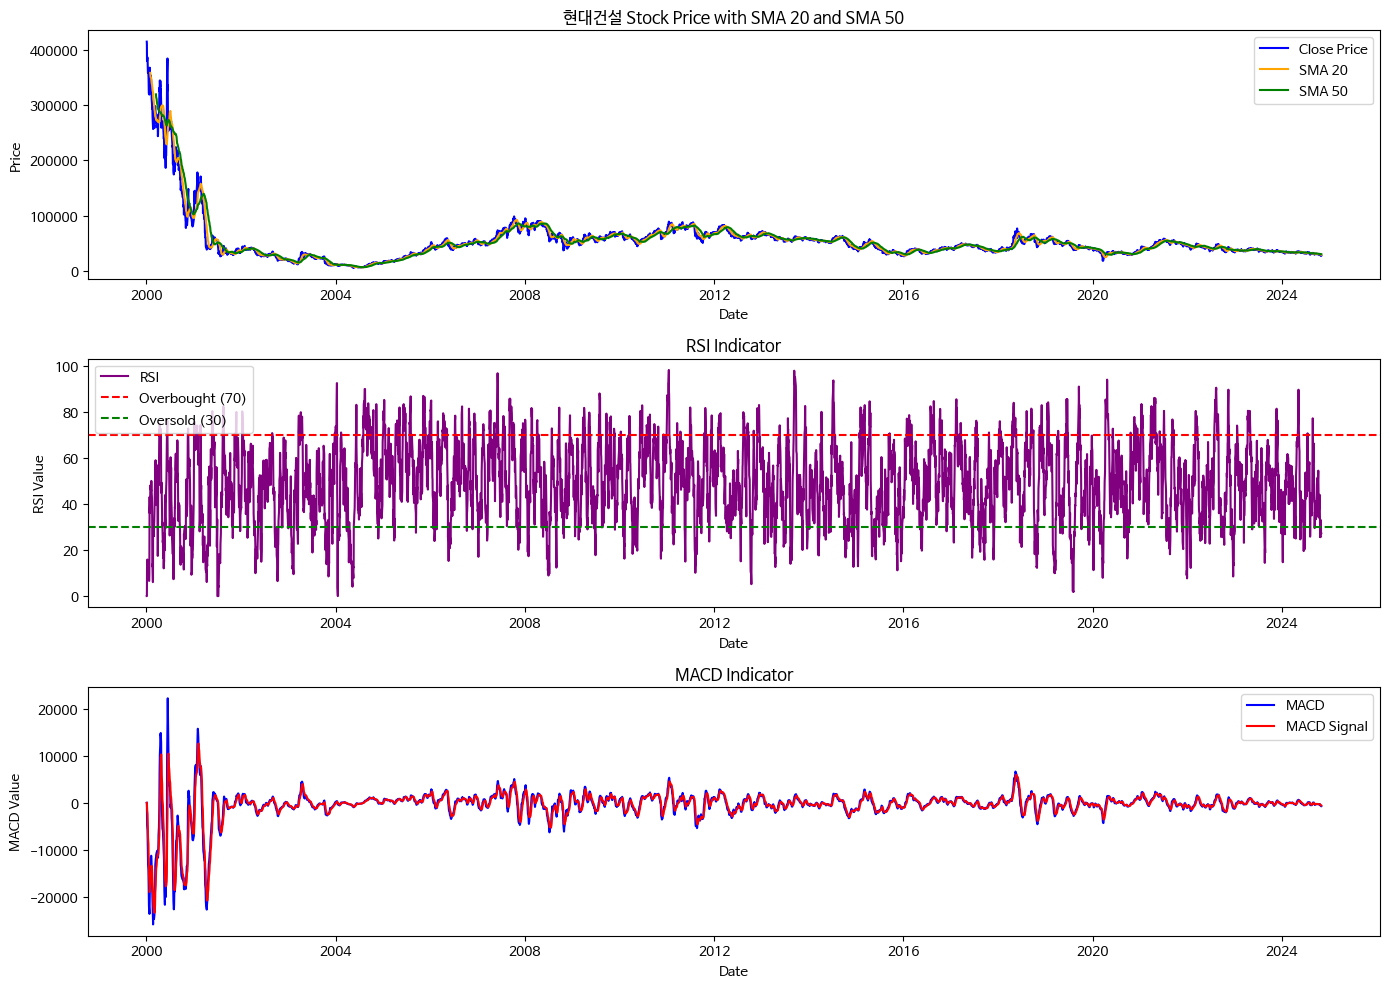

In [7]:
%run main.py 현대건설


모나미 주요 지표 포함 데이터:
           date  open  high   low  close   volume  ticker name        RSI  \
6121 2024-10-25  2250  2260  2175   2200    58008  005360  모나미  20.689655   
6122 2024-10-28  2195  2200  2155   2175    48461  005360  모나미  19.047619   
6123 2024-10-29  2155  2235  2120   2235   145610  005360  모나미  33.802817   
6124 2024-10-30  2405  2855  2270   2320  3855216  005360  모나미  49.397590   
6125 2024-10-31  2285  2295  2220   2225   166331  005360  모나미  40.594059   

       SMA_20  SMA_50       MACD  MACD_signal  
6121  2329.75  2458.0 -61.468597   -57.342050  
6122  2318.50  2450.3 -66.060602   -59.085761  
6123  2309.25  2443.5 -64.119174   -60.092443  
6124  2305.25  2437.6 -55.086783   -59.091311  
6125  2296.75  2429.6 -54.960701   -58.265189  

레이블 완료 데이터:
           date  close  label_avg
6121 2024-10-25   2200          0
6122 2024-10-28   2175          0
6123 2024-10-29   2235          0
6124 2024-10-30   2320          0
6125 2024-10-31   2225          0

훈련 및 테스트 데이터

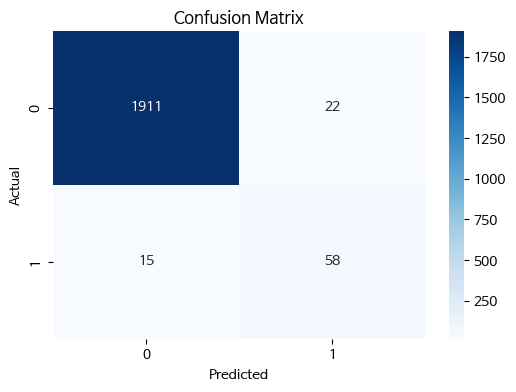

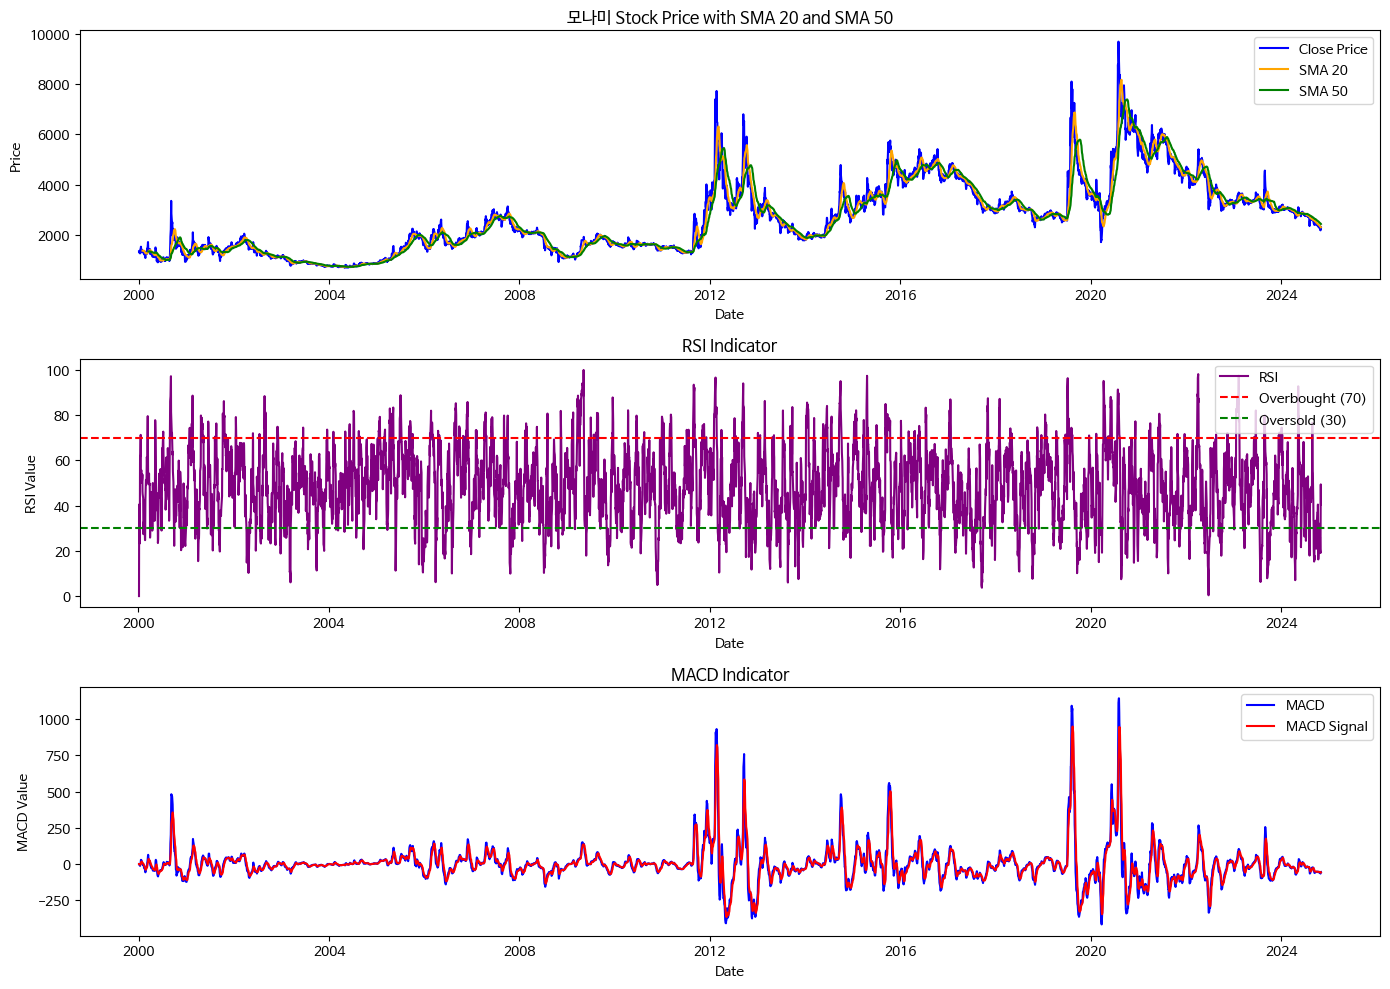

In [8]:
%run main.py 모나미